# Bonus Track Assignment 3 – Dataset #2
Solve the same assignments (A1-3, BTA1-2) using the data from the file “dataset2_lab_2_1.csv”

## Libraries

In [5]:
import pandas as pd
from copy import copy
from matplotlib import pyplot as plt
import warnings

# To work with Google colab
#!wget https://raw.githubusercontent.com/jacons/Computational-NeuroScience-Lab/master/LAB2_1/Assignments/plot_functions.py
#!wget https://raw.githubusercontent.com/jacons/Computational-NeuroScience-Lab/master/LAB2_1/Assignments/HebbianLearning.py
#!mkdir imgs

from LAB2_1.Assignments.plot_functions import principal_components, plot_results2
from LAB2_1.Assignments.HebbianLearning import Hebbian_learning, Oja_rule, Subtractive, BCM_Rule, Covariance_rule

## Retrieve the dateset

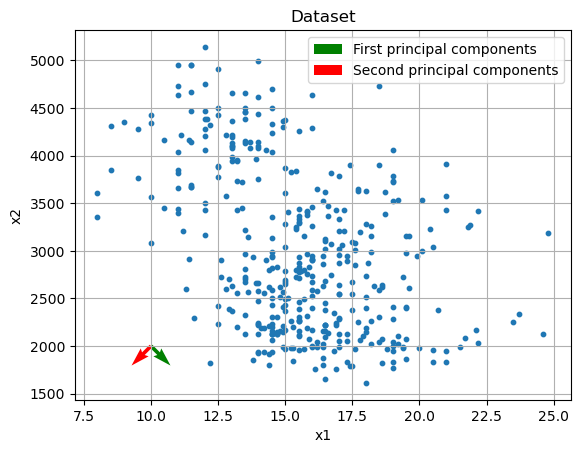

In [6]:
# To work with Google colab
#!wget https://raw.githubusercontent.com/jacons/Computational-NeuroScience-Lab/master/Sources/dataset2_lab_2_1.csv

source2 = pd.read_csv("./../../Sources/dataset2_lab_2_1.csv", header=None).to_numpy()
first_pc2, second_pc2 = principal_components(source2)

plt.scatter(*source2, s=10)

origin_x, origin_y = 10, 2000

plt.quiver(origin_x, origin_y, first_pc2[0], first_pc2[1], label="First principal components",color="green")
plt.quiver(origin_x, origin_y, second_pc2[0], second_pc2[1], label="Second principal components", color="red")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Dataset")
plt.grid()
plt.legend()
plt.show()

### Classic Hebbian learning

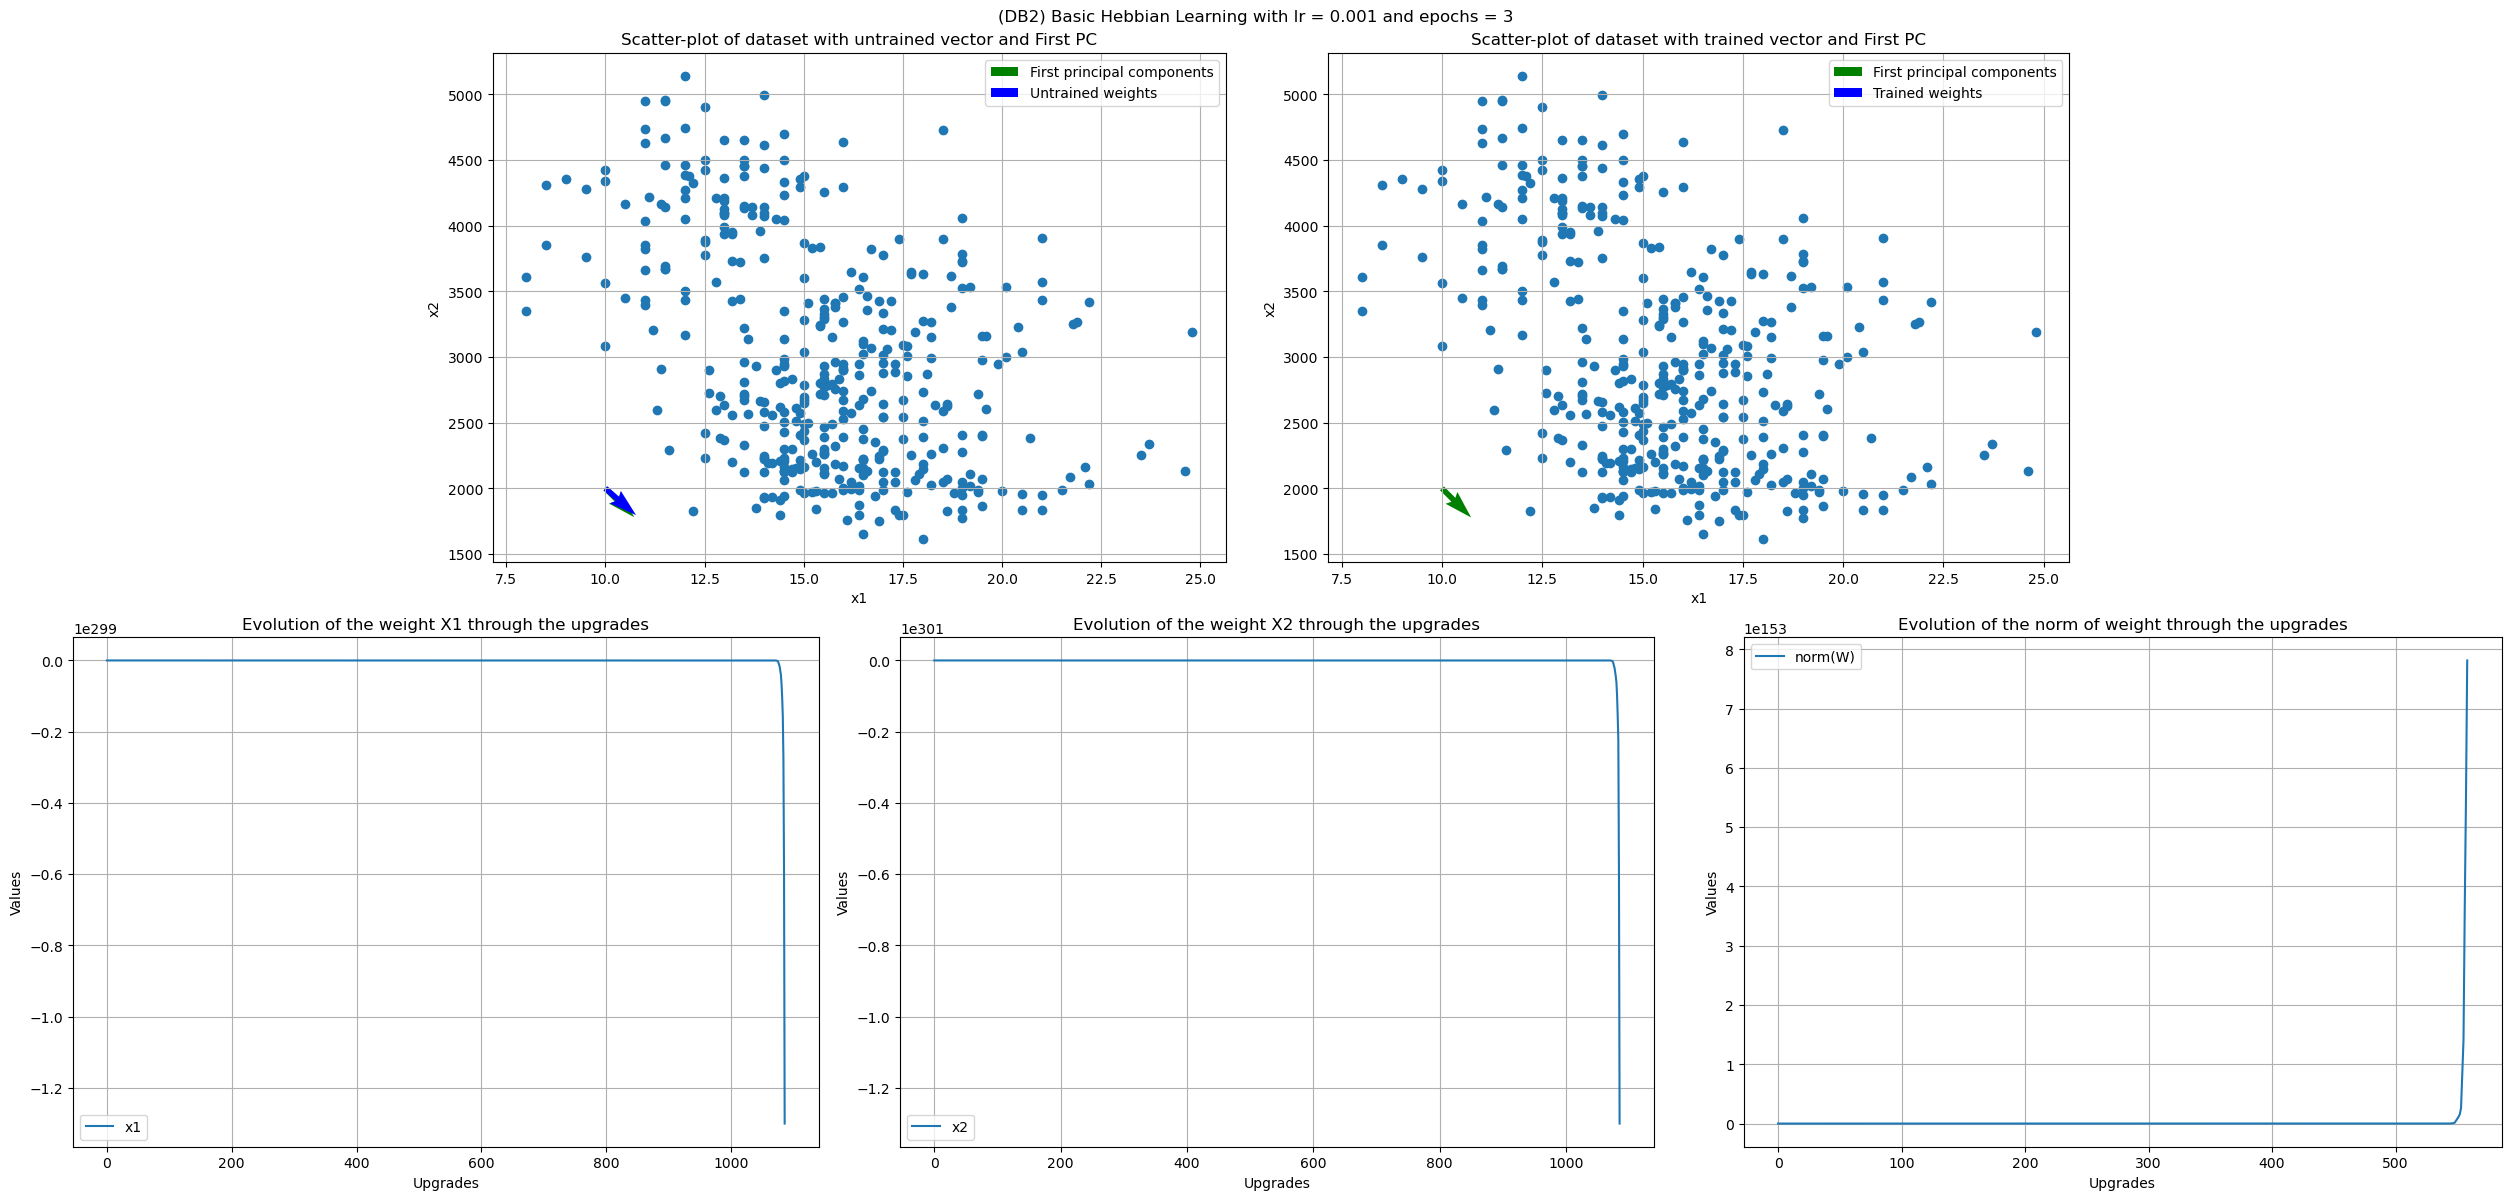

In [7]:
hebbianL = Hebbian_learning(source2.T, lr=1e-07, epochs=3)
untrained_W = copy(hebbianL.W)

with warnings.catch_warnings(): # cause overflow!!
    warnings.filterwarnings('ignore')
    hebbianL()

    plot_results2(
        "(DB2) Basic Hebbian Learning with lr = 0.001 and epochs = 3",
        source2,
        untrained_W,
        hebbianL.W,
        hebbianL.history_x1,
        hebbianL.history_x2,
        first_pc2=first_pc2,
        filename="11 - DB2 Hebbian lr 0_01 epochs 3 theta 100")

### Oja Rule

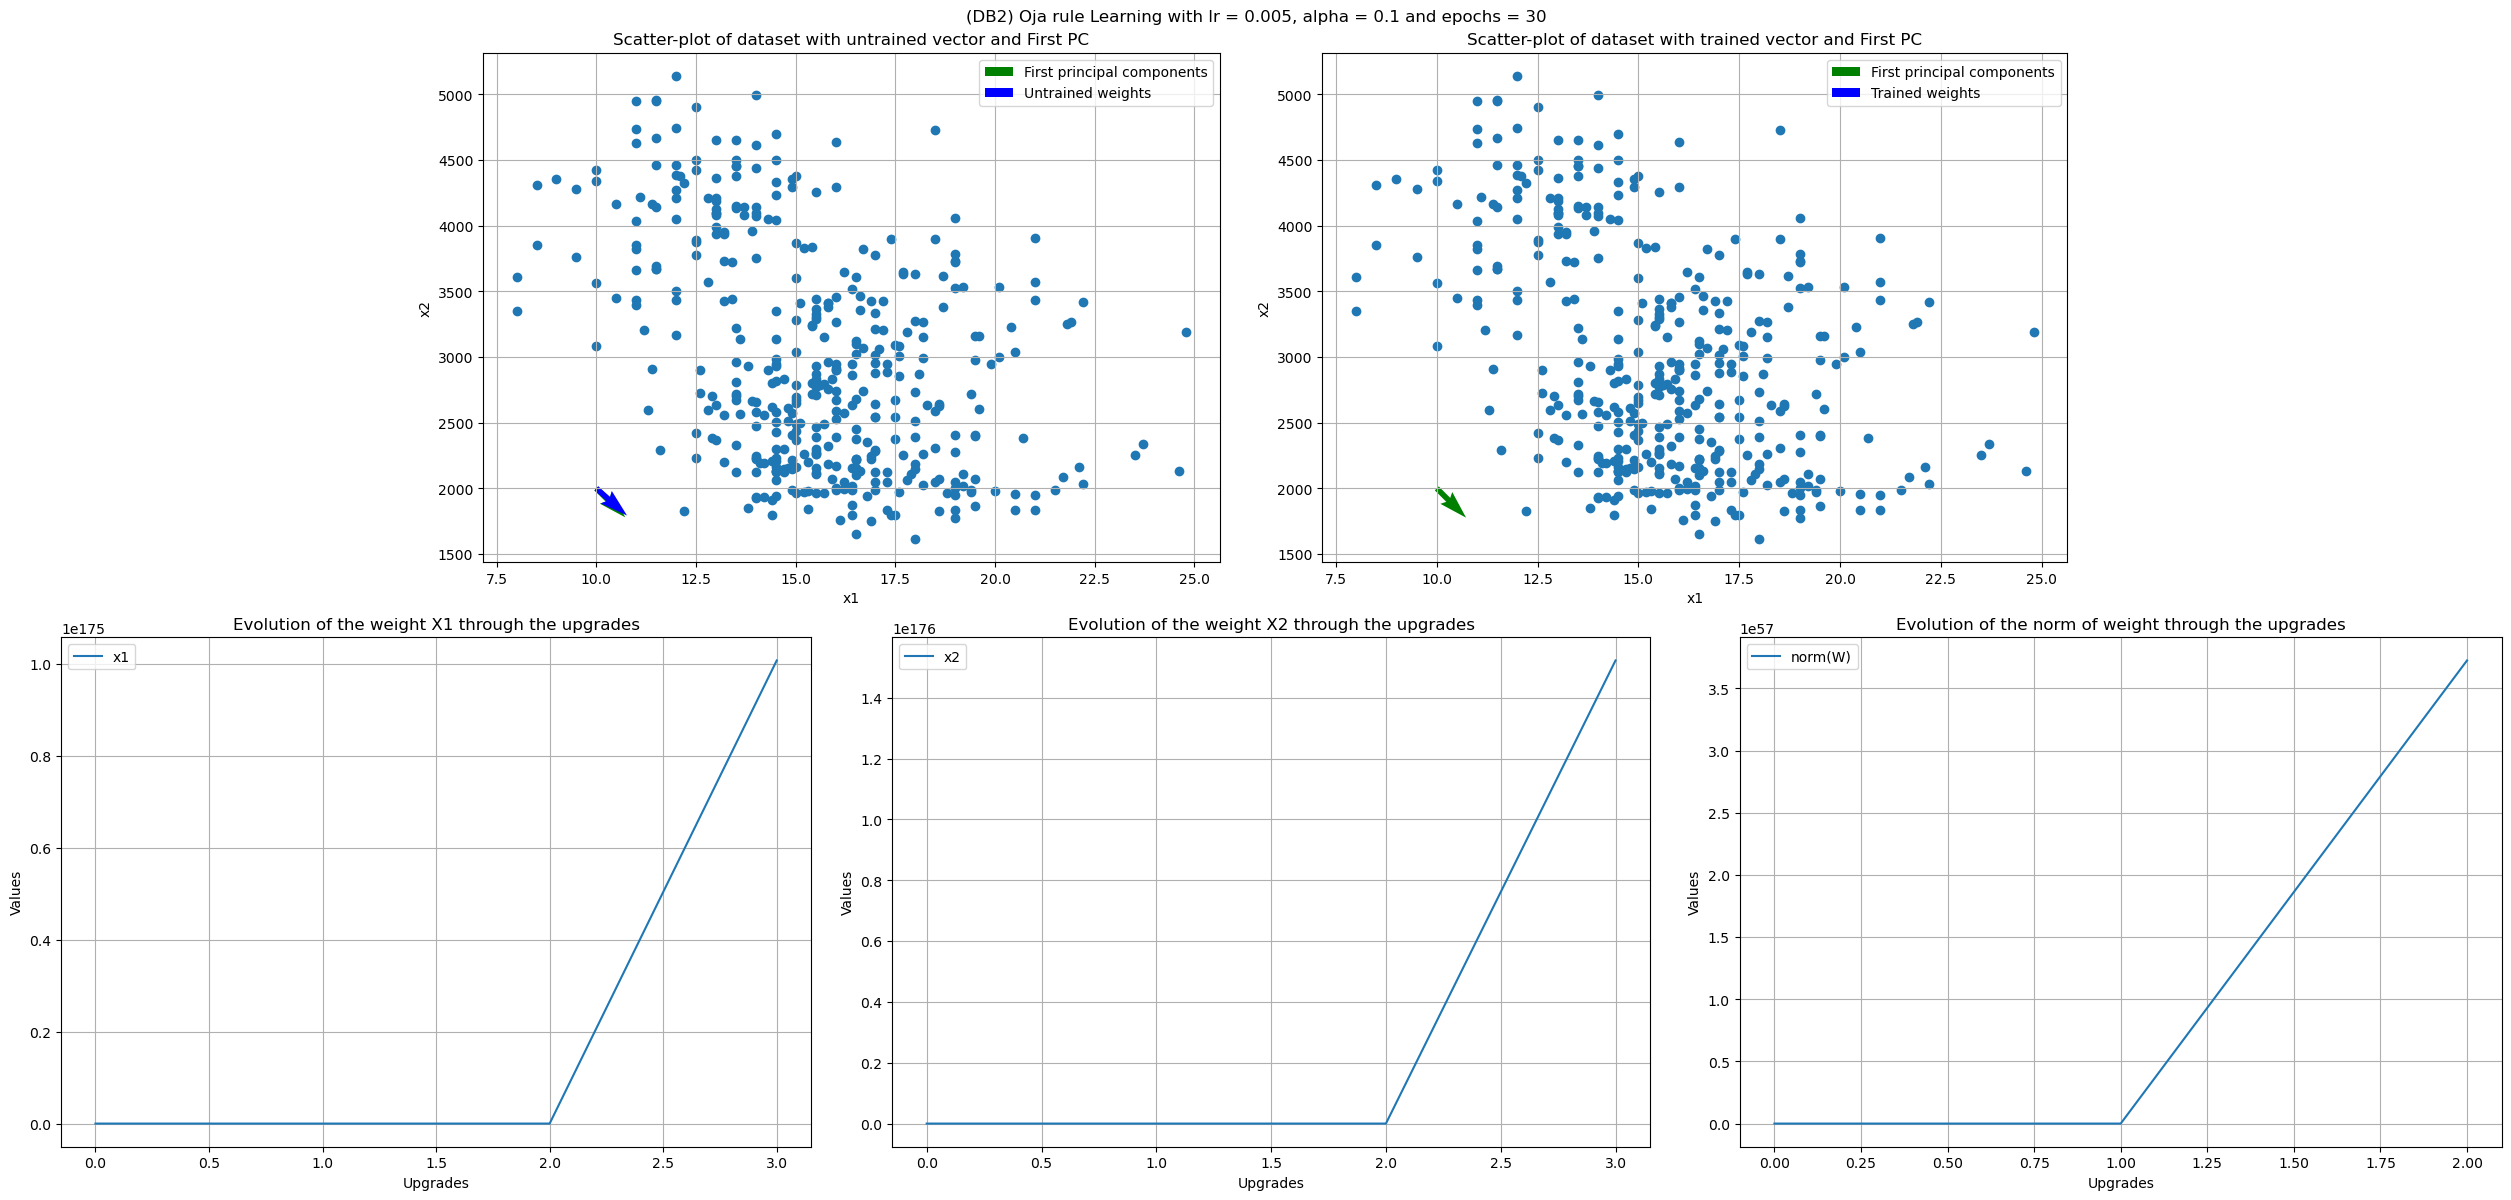

In [8]:
oja_rule = Oja_rule(alpha = 0.1, source = source2.T, lr=0.005, epochs=30)
untrained_W = copy(oja_rule.W)

with warnings.catch_warnings(): # cause overflow!!
    warnings.filterwarnings('ignore')
    oja_rule()

    plot_results2(
        "(DB2) Oja rule Learning with lr = 0.005, alpha = 0.1 and epochs = 30",
        source2,
        untrained_W,
        oja_rule.W,
        oja_rule.history_x1,
        oja_rule.history_x2,
        first_pc2=first_pc2,
        filename="12 - DB2 Oja rule lr 0_005 epochs 30 alpha 0_1")

### Subtractive rule

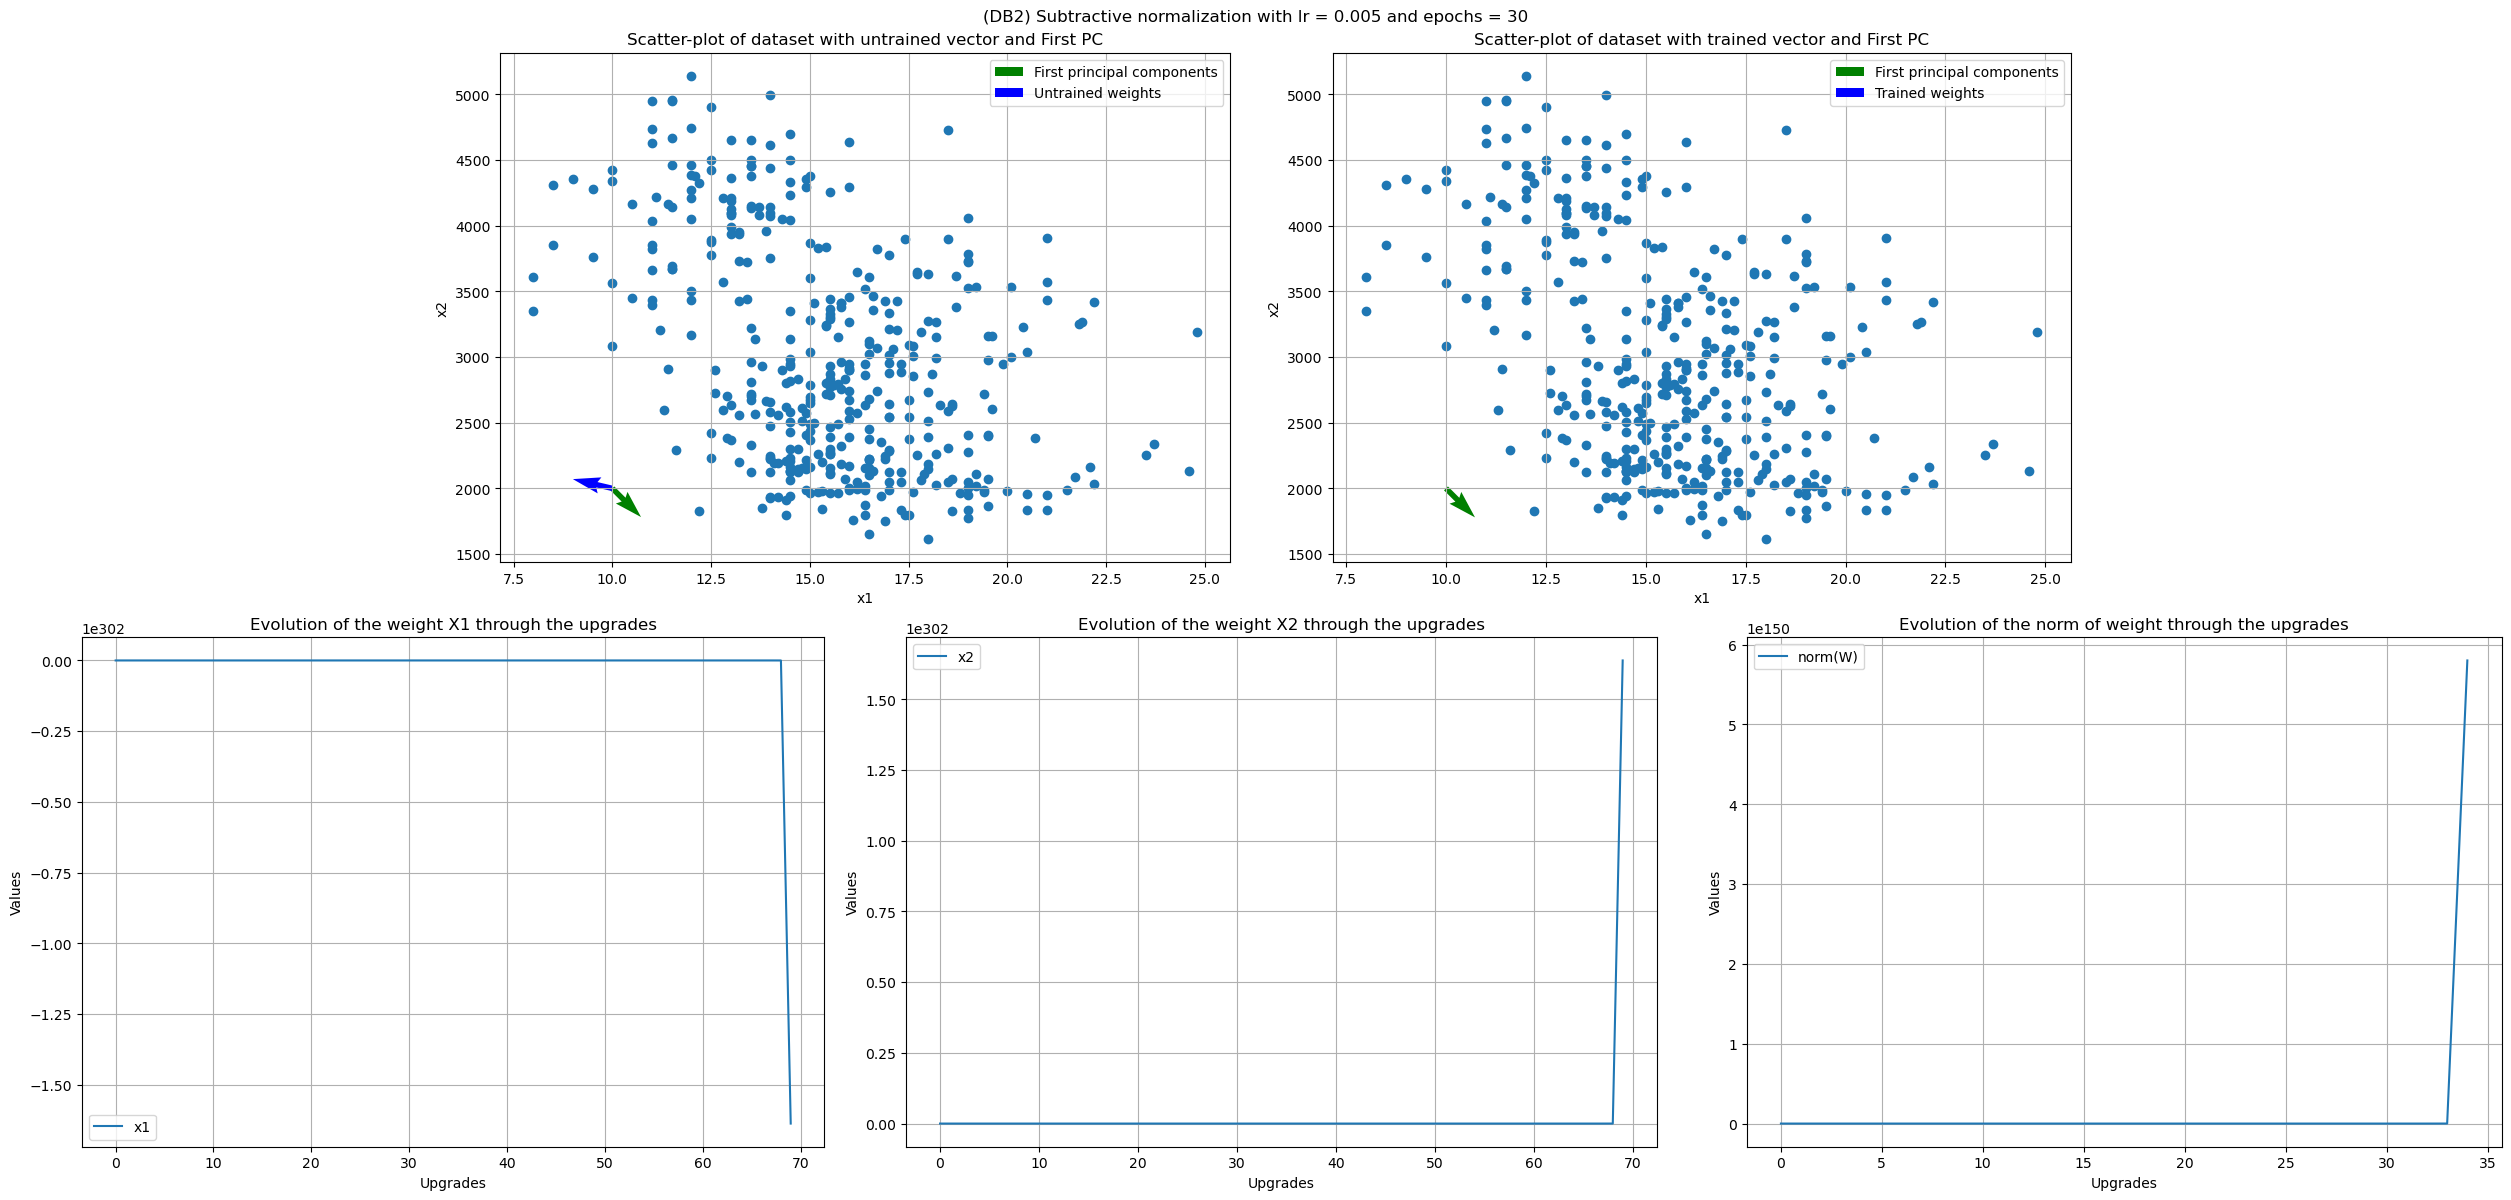

In [9]:
subtractive = Subtractive(source = source2.T, lr=0.005, epochs=30)
untrained_W = copy(subtractive.W)

with warnings.catch_warnings(): # cause overflow!!
    warnings.filterwarnings('ignore')
    subtractive()

    plot_results2(
        "(DB2) Subtractive normalization with lr = 0.005 and epochs = 30",
        source2,
        untrained_W,
        subtractive.W,
        subtractive.history_x1,
        subtractive.history_x2,
        first_pc2=first_pc2,
        filename="13 - DB2 Subtractive lr 0_005 epochs 30")

### BCM Rule

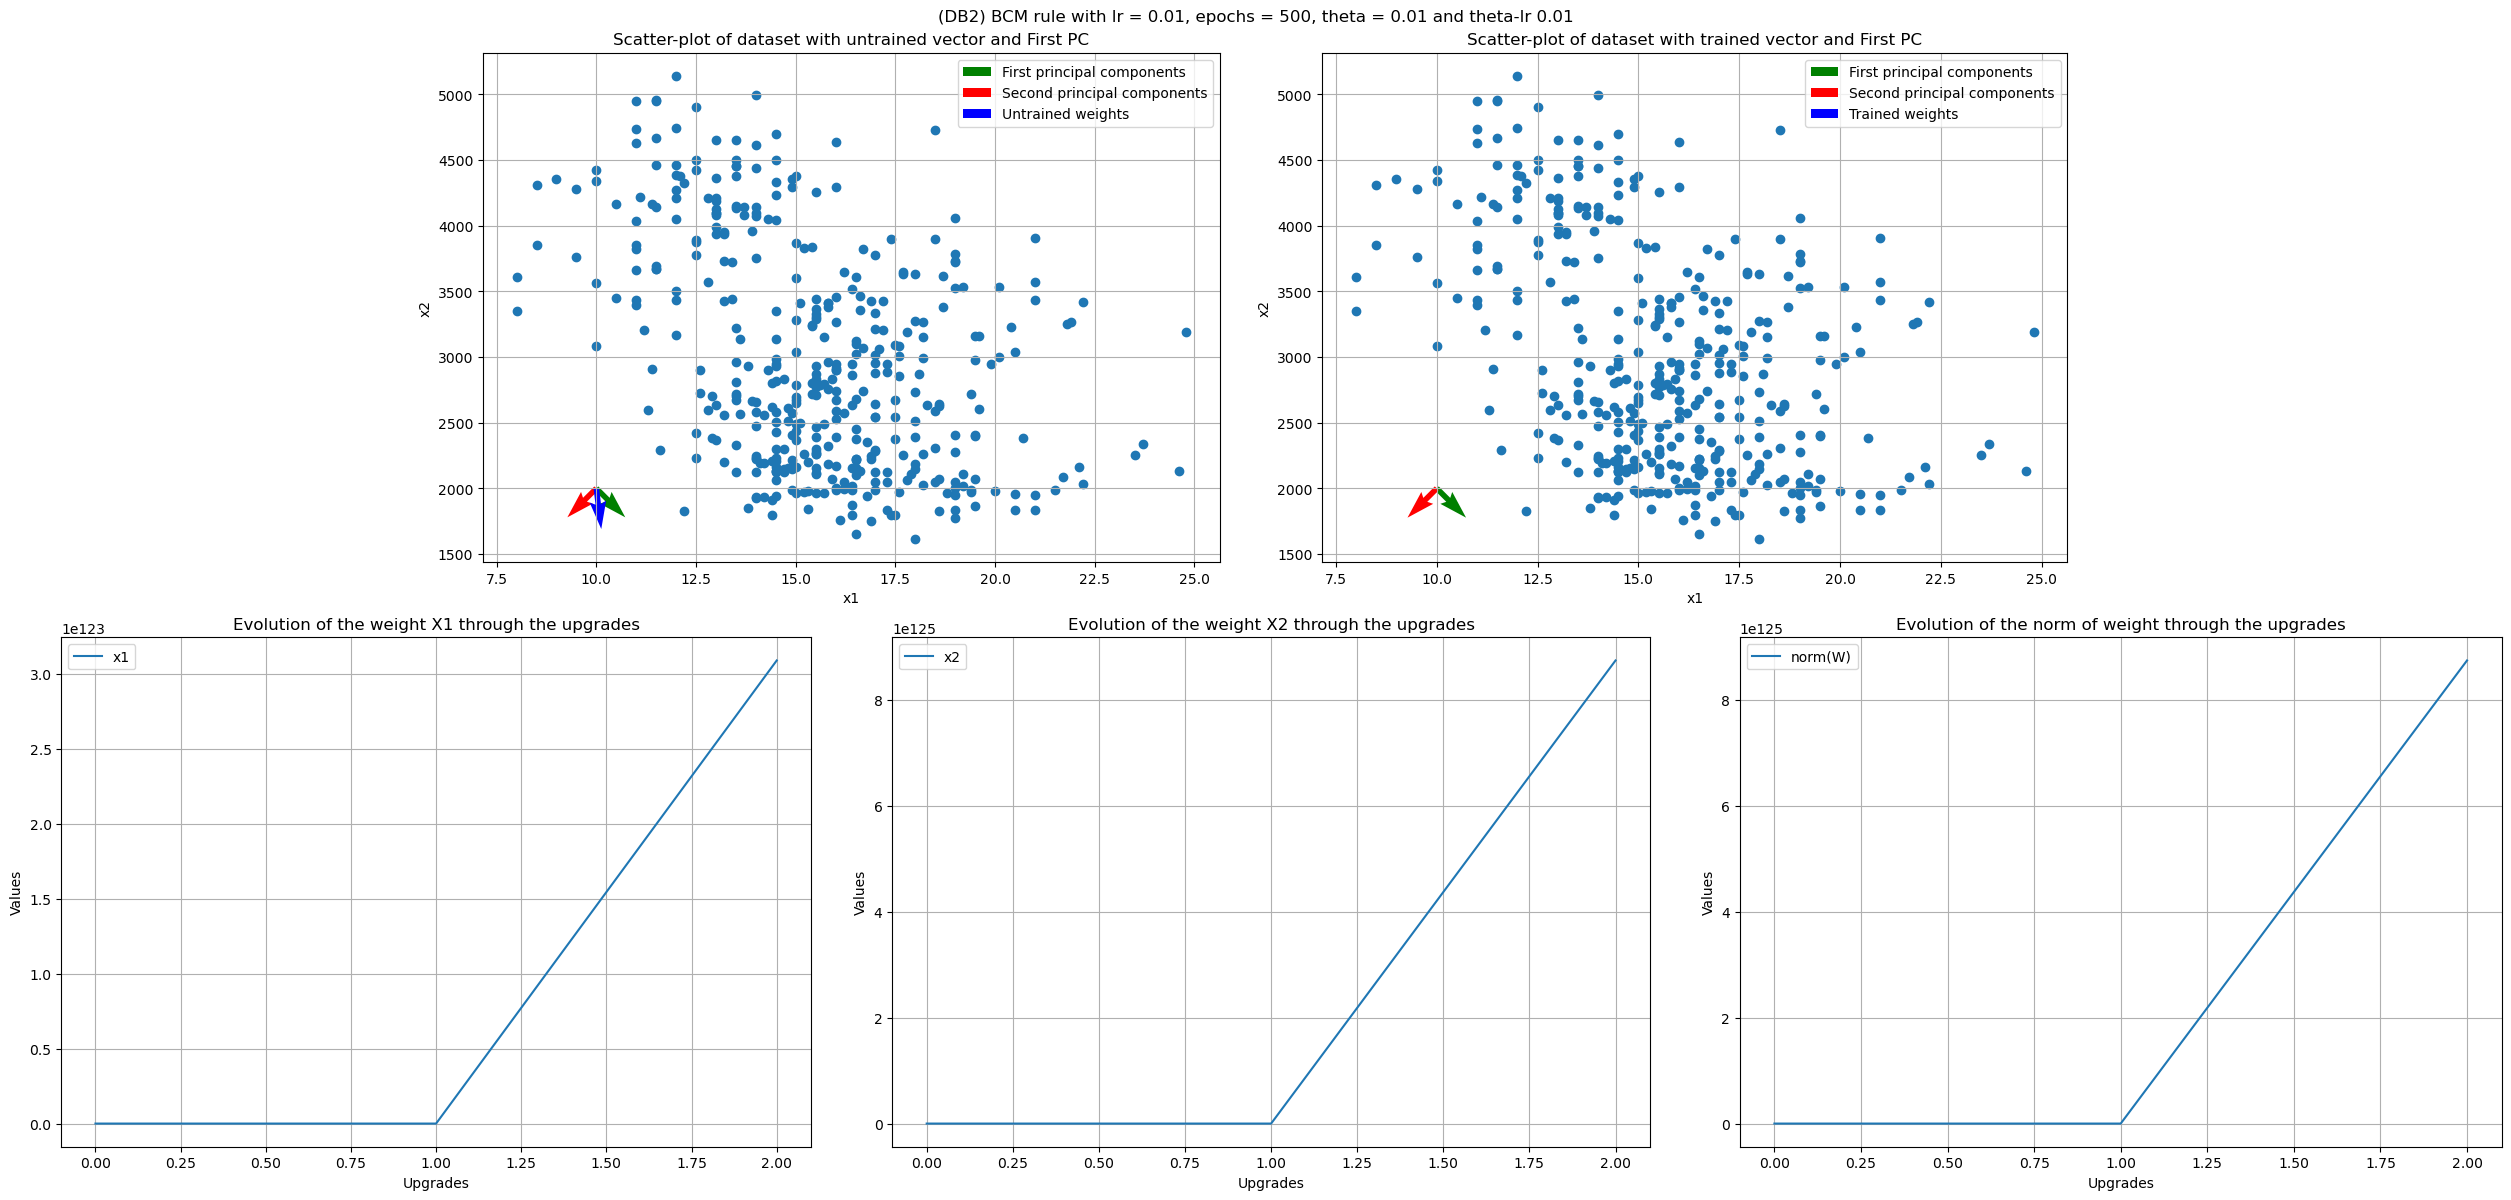

In [10]:
bcm_rule = BCM_Rule(theta = 0.01,
                    theta_lr = 0.01,
                    source = source2.T,
                    lr=0.01,
                    epochs=500,
                    threshold=1e-05)

untrained_W = copy(bcm_rule.W)


with warnings.catch_warnings(): # cause overflow!!
    warnings.filterwarnings('ignore')
    bcm_rule()

    plot_results2(
        "(DB2) BCM rule with lr = 0.01, epochs = 500, theta = 0.01 and theta-lr 0.01",
        source2,
        untrained_W,
        bcm_rule.W,
        bcm_rule.history_x1,
        bcm_rule.history_x2,
        first_pc2=first_pc2,
        second_pc2=second_pc2,
        second_component=True,
        filename="14 - DB2 BCM lr 0_01 epochs 500 theta 0_01 theta_lr 0_01")

### Covariance Rule

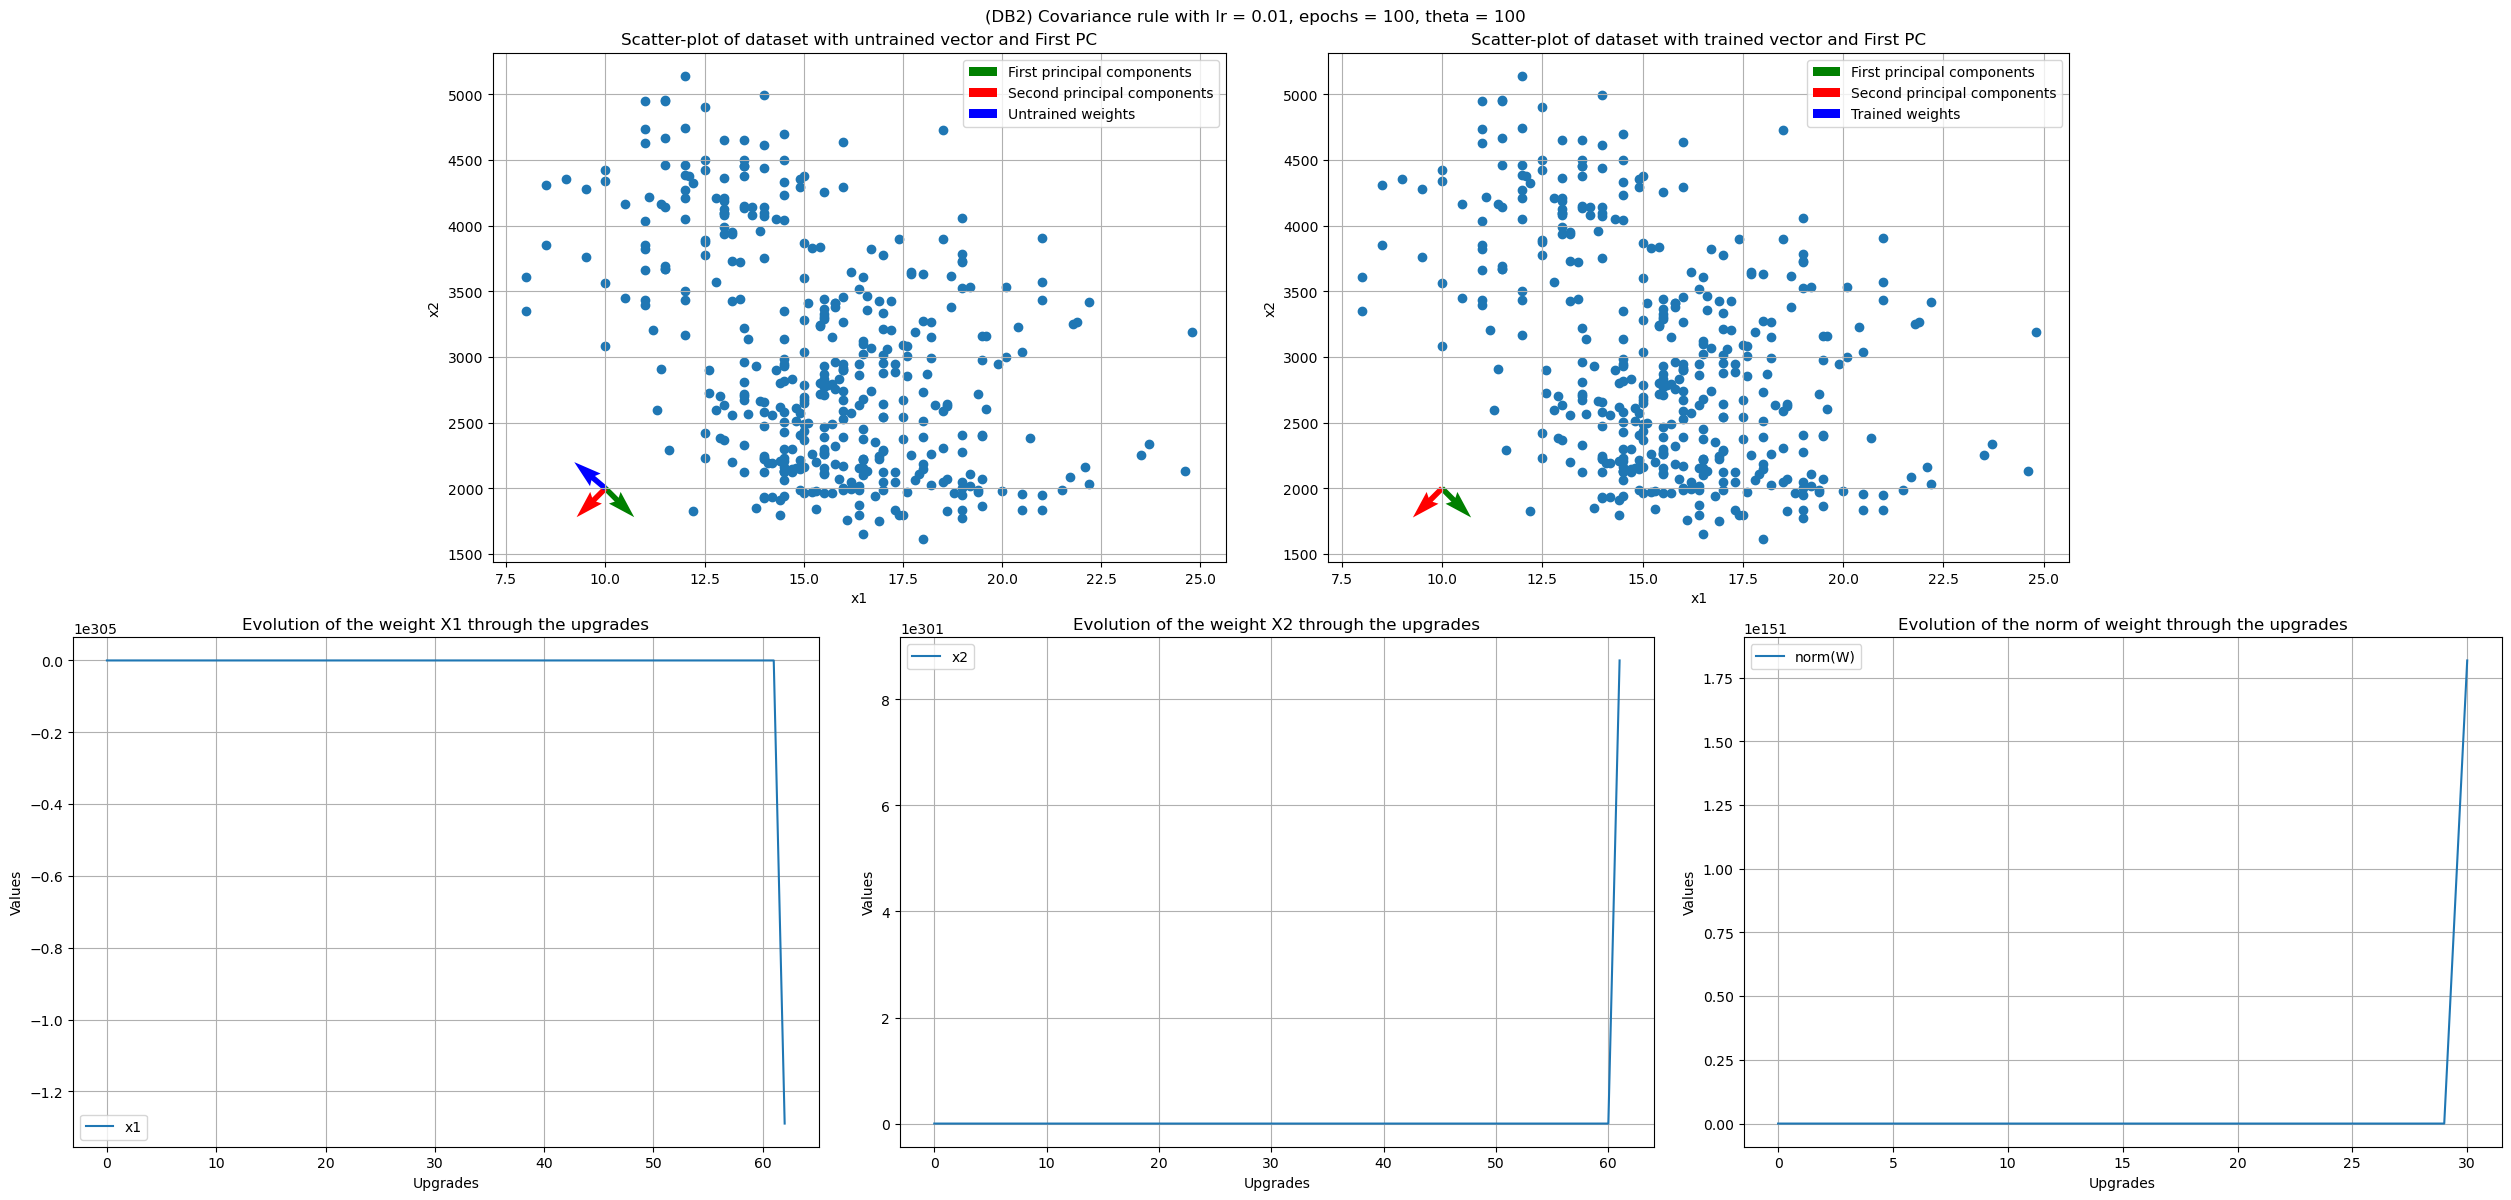

In [11]:
conv_rule = Covariance_rule(theta = 100,
                            source = source2.T,
                            lr=0.01,
                            epochs=100,
                            threshold=1e-05)

untrained_W = copy(conv_rule.W)

with warnings.catch_warnings(): # cause overflow!!
    warnings.filterwarnings('ignore')
    conv_rule()

    plot_results2(
        "(DB2) Covariance rule with lr = 0.01, epochs = 100, theta = 100",
        source2,
        untrained_W,
        conv_rule.W,
        conv_rule.history_x1,
        conv_rule.history_x2,
        first_pc2=first_pc2,
        second_pc2=second_pc2,
        second_component=True,
        filename="15 - DB2 Covariance lr 0_01 epochs 100 theta 100")